# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2*numpy.sin(x)

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    '''Analytical integral of f(x).'''
    return -x**2*numpy.cos(x)+2*x*numpy.sin(x)+2*numpy.cos(x)-2

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return (-xmax**2*numpy.cos(xmax)+2*xmax*numpy.sin(xmax)+2*numpy.cos(xmax))-(-xmin**2*numpy.cos(xmin)+2*xmin*numpy.sin(xmin)+2*numpy.cos(xmin))

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [59]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    panelwidth = (xmax-xmin)/N
    i=0
    Npanels_area=0
    x3=xmin
    for i in range(0,N):
        "x1 = xmin+i*panelwidth"
        x1 = x3
        x2 = x1+panelwidth/2
        x3 = x1+panelwidth
        Npanels_area = Npanels_area+(panelwidth/6)*(x1**2*numpy.sin(x1)+4*x2**2*numpy.sin(x2)+x3**2*numpy.sin(x3))
        i=i+1
    return Npanels_area

Make sure you have implemented Simpson's rule correctly:

In [60]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [61]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

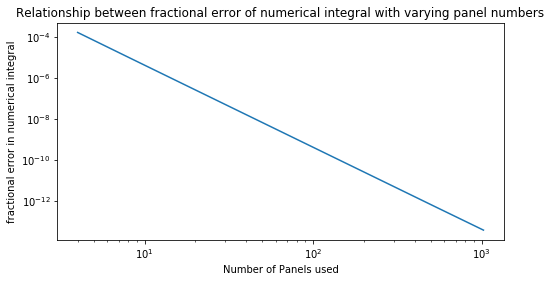

In [58]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1) # Define reference value from analytical solution
result_numeric =[]
for panel in panel_counts:
    result_numeric.append(integrate_numeric(x0, x1, panel))
plt.figure(figsize=(8, 4))
plt.xlabel("Number of Panels used")
plt.ylabel("fractional error in numerical integral")
plt.title("Relationship between fractional error of numerical integral with varying panel numbers")
plt.loglog(panel_counts, (result_analytic-result_numeric)/result_analytic)

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The higher the number of panels the higher the accuracy of the numerical method but a larger number of calculations is required. Making the number of panels 10 times bigger makes the error 10,000 times smaller ($\sigma_{numerical}=\frac{1}{N^4}$). If the numer of panels is too large then zero round-off errors will be introduced compromising the accuracy of the numerical method.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the panel count would increase the accuracy for the trapezium rule aswell, however, for the trapezium rule ($\sigma_{numerical}=\frac{1}{N^2}$)